In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers,models
import os

In [ ]:
with ZipFile('/content/archive (28).zip','r') as zip:
  zip.extractall()

BadZipFile: File is not a zip file

In [ ]:
train_data='/content/melanoma_cancer_dataset/train'

In [ ]:
test_data='/content/melanoma_cancer_dataset/test'

In [ ]:
print(len(os.listdir(train_data)))
print(len(os.listdir(test_data)))


2
2


In [ ]:
print(len(os.listdir('/content/melanoma_cancer_dataset/train/benign')))

5000


In [ ]:
print(os.listdir('/content/melanoma_cancer_dataset/train/benign'))

['melanoma_3533.jpg', 'melanoma_2884.jpg', 'melanoma_4001.jpg', 'melanoma_4794.jpg', 'melanoma_1266.jpg', 'melanoma_3953.jpg', 'melanoma_4330.jpg', 'melanoma_1867.jpg', 'melanoma_533.jpg', 'melanoma_1716.jpg', 'melanoma_4348.jpg', 'melanoma_4602.jpg', 'melanoma_4953.jpg', 'melanoma_4675.jpg', 'melanoma_3206.jpg', 'melanoma_3500.jpg', 'melanoma_106.jpg', 'melanoma_2461.jpg', 'melanoma_4299.jpg', 'melanoma_1687.jpg', 'melanoma_4307.jpg', 'melanoma_3557.jpg', 'melanoma_3516.jpg', 'melanoma_1286.jpg', 'melanoma_4922.jpg', 'melanoma_4847.jpg', 'melanoma_2297.jpg', 'melanoma_2106.jpg', 'melanoma_3560.jpg', 'melanoma_339.jpg', 'melanoma_442.jpg', 'melanoma_3199.jpg', 'melanoma_3446.jpg', 'melanoma_3859.jpg', 'melanoma_613.jpg', 'melanoma_3122.jpg', 'melanoma_3973.jpg', 'melanoma_3565.jpg', 'melanoma_1603.jpg', 'melanoma_3840.jpg', 'melanoma_1973.jpg', 'melanoma_4443.jpg', 'melanoma_1790.jpg', 'melanoma_4868.jpg', 'melanoma_4912.jpg', 'melanoma_3331.jpg', 'melanoma_291.jpg', 'melanoma_309.jpg'

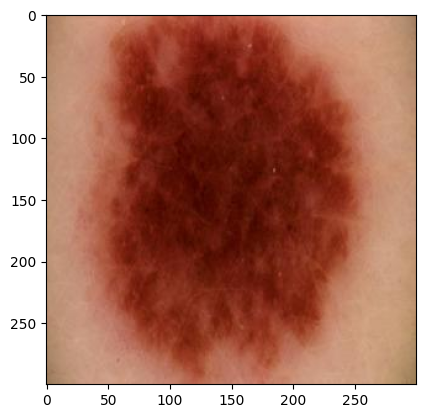

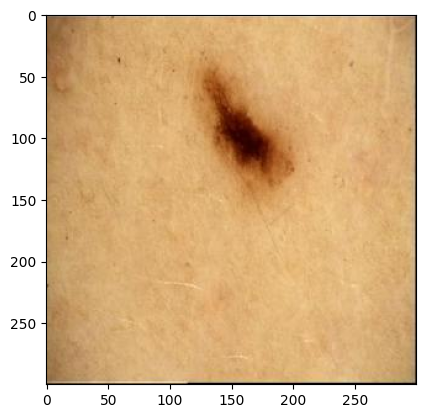

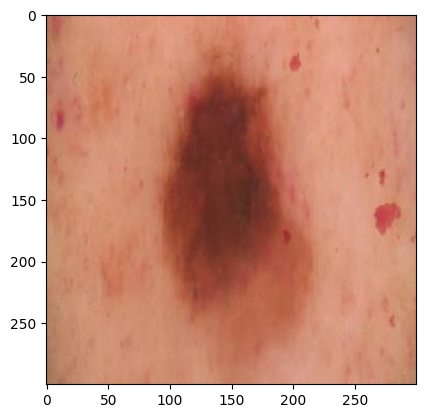

In [ ]:
tarin_img=('/content/melanoma_cancer_dataset/train/benign/melanoma_1047.jpg','/content/melanoma_cancer_dataset/train/benign/melanoma_1070.jpg','/content/melanoma_cancer_dataset/train/malignant/melanoma_5084.jpg')
for img in tarin_img:
  img=mpimg.imread(img)
  plt.imshow(img)
  plt.show()


In [ ]:
print(img)


[[[168 114  86]
  [169 113  86]
  [174 116  92]
  ...
  [189 131 109]
  [189 131 111]
  [189 131 111]]

 [[170 114  87]
  [170 114  87]
  [176 116  92]
  ...
  [189 131 109]
  [189 131 111]
  [189 131 111]]

 [[172 115  88]
  [172 115  88]
  [176 116  92]
  ...
  [189 131 109]
  [189 131 111]
  [189 131 111]]

 ...

 [[157 113  84]
  [161 117  88]
  [167 122  93]
  ...
  [185 131 103]
  [183 132 103]
  [184 133 104]]

 [[155 114  84]
  [159 118  88]
  [166 122  93]
  ...
  [184 130 102]
  [183 132 103]
  [184 133 104]]

 [[155 114  84]
  [159 118  88]
  [166 122  93]
  ...
  [184 130 102]
  [183 132 103]
  [184 133 104]]]


In [ ]:
print(type(img))

<class 'numpy.ndarray'>


In [ ]:
img.shape

(300, 300, 3)

In [ ]:
img.ndim

3

In [ ]:
img_size=256
batch_size=32

data Augmentation

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
train_ds=image_dataset_from_directory(
    train_data,
    shuffle=True,
    label_mode='categorical',
    seed=123,
    image_size=(img_size,img_size),
    batch_size=batch_size
)
test_ds=image_dataset_from_directory(
    test_data,
    shuffle=True,
    label_mode='categorical',
    seed=123,
    image_size=(img_size,img_size),
    batch_size=batch_size
)
for x,y in train_ds.take(1):
  print(x.shape)
  print(y.shape)
for x,y in test_ds.take(1):
  print(x.shape)
  print(y.shape)

Found 9605 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
(32, 256, 256, 3)
(32, 2)
(32, 256, 256, 3)
(32, 2)


In [ ]:
class_names=train_ds.class_names
print(class_names)

['benign', 'malignant']


In [ ]:
print('Number of training batches: %d' % tf.data.experimental.cardinality(train_ds).numpy())
print('Number of testing batches: %d' % tf.data.experimental.cardinality(test_ds).numpy())

Number of training batches: 301
Number of testing batches: 32


In [ ]:
AUTOTUNE=tf.data.AUTOTUNE
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds=test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer=layers.Rescaling(1./255)

In [ ]:
normalized_train_ds=train_ds.map(lambda x,y:(normalization_layer(x),y))
normalized_test_ds=test_ds.map(lambda x,y:(normalization_layer(x),y))
image_batch,labels_batch=next(iter(normalized_train_ds))
first_image=image_batch[0]
print(np.min(first_image),np.max(first_image))

0.0031778973 0.8013919


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='softmax'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 246016)            0         
                                                                 
 dense_12 (Dense)            (None, 512)              

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,validation_data=test_ds,epochs=10)

Epoch 1/10
301/301 [==============================] - 234s 778ms/step - loss: 0.6936 - accuracy: 0.5153 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 2/10
301/301 [==============================] - 236s 785ms/step - loss: 0.6929 - accuracy: 0.5166 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 3/10
284/301 [===========================>..] - ETA: 13s - loss: 0.6925 - accuracy: 0.5179